In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./kaggle/input\co-544-project\fulldata.csv
./kaggle/input\co-544-project\full_test.csv
./kaggle/input\co-544-project\testdata.csv
./kaggle/input\co-544-project\testdata_10%.csv
./kaggle/input\co-544-project\testdata_10%.xlsx
./kaggle/input\co-544-project\test_preds.csv
./kaggle/input\co-544-project\trainData.csv


In [2]:
df_train = pd.read_csv('./kaggle/input/co-544-project/trainData.csv')
#df_train = df_train.sample(frac=1)
train_len = len(df_train)
df_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202,g,Success
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43,g,Success
2,a,24.5,u,g,0.50,q,824,False,h,1.50,True,0,False,280,g,Success
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100,g,Success
4,b,25,u,g,11.25,c,1208,True,v,2.50,True,17,False,200,g,Success


In [3]:
df_test= pd.read_csv('./kaggle/input/co-544-project/full_test.csv')
df_valid_y = df_test.A16
df_test.drop('A16', axis = 1, inplace=True)
test_len = len(df_test)
df_test.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,32.67,y,p,9.00,w,0,False,h,5.25,True,0,True,154,g
1,a,28.08,y,p,15.00,e,13212,False,z,0.00,True,0,False,0,g
2,b,73.42,u,g,17.75,ff,0,False,ff,0.00,True,0,True,0,g
3,b,64.08,u,g,20.00,x,1000,True,h,17.50,True,9,True,0,g
4,b,51.58,u,g,15.00,c,0,True,v,8.50,True,9,False,0,g


In [4]:
# Combine X 
df = pd.concat([df_train.drop('A16',axis=1), df_test])
len(df)

690

In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202,g
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43,g
2,a,24.5,u,g,0.50,q,824,False,h,1.50,True,0,False,280,g
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100,g
4,b,25,u,g,11.25,c,1208,True,v,2.50,True,17,False,200,g


In [6]:
df.dtypes

A1      object
A2      object
A3      object
A4      object
A5     float64
A6      object
A7       int64
A8        bool
A9      object
A10    float64
A11       bool
A12      int64
A13       bool
A14     object
A15     object
dtype: object

In [7]:
# Columns A3 and A4 are same
# df.drop('A4', axis=1, inplace=True)
df.replace('?',np.NaN,inplace=True)



In [8]:
df_test.dtypes

A1      object
A2      object
A3      object
A4      object
A5     float64
A6      object
A7       int64
A8        bool
A9      object
A10    float64
A11       bool
A12      int64
A13       bool
A14     object
A15     object
dtype: object

25.365384615384613


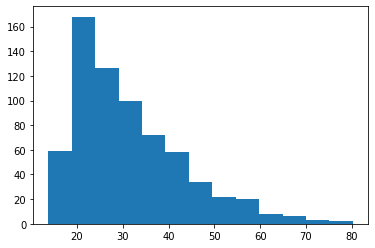

In [9]:
# Calculate max frequency bar value to fill A2 null values
bins = 13
data = df.loc[df['A2'].notnull(), 'A2'].astype(np.float64).tolist()
y, x, _ = plt.hist(data, histtype='bar', bins=bins)
y_max = y.max()
idx = np.where(y == y_max)[0][0]
A2_fill_value = x[idx] + bins/2
print(A2_fill_value)

In [10]:

# Calculate mean of A14 to fill null values
A14_fill_value = df.loc[df['A14'].notnull(), 'A14'].astype(np.float64).mean()

In [11]:

df['A2']=df['A2'].astype(str).astype(float)
df['A2']=df['A2'].astype(str).astype(float)


df['A14']=df['A14'].astype(str).astype(float)
df['A14']=df['A14'].astype(str).astype(float)

In [12]:
A2_mean=df['A2'].mean()
#A2_mean = A2_fill_value
A14_mean=df['A14'].mean()
#A14_mean=A14_fill_value

A1_max_occurrence=df['A1'].value_counts().idxmax()
A6_max_occurrence=df['A6'].value_counts().idxmax()
A9_max_occurrence=df['A9'].value_counts().idxmax()
A3_max_occurrence=df['A3'].value_counts().idxmax()
A4_max_occurrence=df['A4'].value_counts().idxmax()

df=df.fillna({'A2':A2_mean,'A14':A14_mean,'A1':A1_max_occurrence,'A6':A6_max_occurrence,'A9':A9_max_occurrence,'A3':A3_max_occurrence,'A4':A4_max_occurrence})


In [13]:
df['A1'].value_counts().idxmax()

'b'

In [14]:
#df.A2 = df.A2.astype(np.float64)
#df.A14 = df.A14.astype(np.int64)

In [15]:


#df=df.fillna({'A2':A2_fill_value,'A14':A14_fill_value})
#df=df.fillna({'A3':'u', 'A6':'c', 'A9':'v'})

In [16]:
df_valid_y.head()

0    Success
1    Success
2    Success
3    Success
4    Success
Name: A16, dtype: object

In [17]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202.0,g
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43.0,g
2,a,24.50,u,g,0.50,q,824,False,h,1.50,True,0,False,280.0,g
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100.0,g
4,b,25.00,u,g,11.25,c,1208,True,v,2.50,True,17,False,200.0,g


In [18]:
# encode A16 lables
df_train['A16'] = df_train['A16'].map({label:idx for idx,label in enumerate(np.unique(df_train['A16']))})
df_valid_y = df_valid_y.map({label:idx for idx,label in enumerate(np.unique(df_valid_y))})

In [19]:
drop_labels=[
    'A1',
    'A2',
    'A3',
    #'A4',
    'A5',
    'A6',
    'A7',
    'A8',
    'A9',
    'A10',
    #'A11',
    'A12',
    'A13',
    'A14',
    #'A15'
]
dummy_labels=['A14', 'A15']
encode_labels = ['A1', 'A3', 'A4', 'A6','A9','A15']

for en in encode_labels:
    if (en in dummy_labels) or (en in drop_labels):
        encode_labels.remove(en)

for lbl in encode_labels:
    df[lbl] = df[lbl].map({label:idx for idx,label in enumerate(np.unique(df[lbl]))})

In [20]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,1,0,0.00,w,0,True,7,1.25,True,1,False,202.0,g
1,a,58.67,1,0,4.46,q,560,True,3,3.04,True,6,False,43.0,g
2,a,24.50,1,0,0.50,q,824,False,3,1.50,True,0,False,280.0,g
3,b,27.83,1,0,1.54,w,3,True,7,3.75,True,5,True,100.0,g
4,b,25.00,1,0,11.25,c,1208,True,7,2.50,True,17,False,200.0,g


In [21]:
feature_columns = df.drop(drop_labels, axis=1).columns.tolist()
print(feature_columns)
new_df = pd.DataFrame()
#print(new_df.head())
#print('\n')

for lbl in feature_columns:
    if lbl in dummy_labels:
        x_A = pd.get_dummies(df[[lbl]],drop_first=True)
    else:
        x_A=df[lbl]
        
    #print(x_A)
    new_df=pd.concat([new_df, x_A],axis=1)
    #print(new_df.head())
    #print('\n')
    
df=new_df

['A4', 'A11', 'A15']


In [22]:
df.head()

,A4,A11,A15_p,A15_s
0,0,True,0,0
1,0,True,0,0
2,0,True,0,0
3,0,True,0,0
4,0,True,0,0


In [23]:
# Separate back to train_X, and test_X and join train_y to train_X

df_train = pd.concat([df.iloc[0:-test_len], df_train['A16']], axis=1)
print("train size: ", len(df_train))

df_test = df.iloc[-test_len:]
print("test size: ",len( df_test))

train size:  552
test size:  138


In [24]:
feature_cols=df_train.drop('A16', axis=1).columns
print(feature_cols)
#split dataset in features and target variable
X = df_train[feature_cols] # Features
y = df_train.A16 # Target variable

Index(['A4', 'A11', 'A15_p', 'A15_s'], dtype='object')


In [25]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1) # 70% training and 30% test

#X_test = df_test
X_train = X
y_train = y

X_valid = df_test
y_valid = df_valid_y


In [26]:
#-------------- Feature scaling --------------------------------------------
# random forest, decision trees do not need feature scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#stdsc = StandardScaler()
stdsc = StandardScaler()
X_train = pd.DataFrame(stdsc.fit_transform(X_train))
X_valid = pd.DataFrame(stdsc.transform(X_valid))

#X_test = pd.DataFrame(stdsc.transform(X_test))

#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X_train = pd.DataFrame(mms.fit_transform(X_train))
#X_valid = pd.DataFrame(mms.transform(X_valid))

In [27]:
# Function for comparing different models
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
    
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    A = metrics.accuracy_score(y_v, preds)
    P = metrics.precision_score(y_v, preds)
    R = metrics.recall_score(y_v, preds)
    F = 2*P*R/(P+R)
    mae = mean_absolute_error(y_v, preds)
    cvscore = cross_val_score(model, X_v, y_v, cv=10)
    return [A, F, mae, cvscore]

def plot_models(models):
    
    plt.figure(figsize=(12,3))

    for i in range(0, len(models)):
        A, F, mae, cvscore = score_model(models[i])

        plt.subplot(141)
        plt.bar((i+1), A)
        plt.title('Accuracy')

        plt.subplot(142)
        plt.bar((i+1), F)
        plt.title('Fscore')

        plt.subplot(143)
        plt.bar((i+1), mae)
        plt.title('MAE')

        plt.subplot(144)
        plt.bar((i+1), cvscore.mean())
        plt.title('Cross validation score')

        print("Model %d Accuracy: %f Fscore: %f MAE: %f CorssValid: %.2f (+/- %.2f)" % (i+1, A, F, mae, cvscore.mean(), cvscore.std() * 2))


Model 1 Accuracy: 0.920290 Fscore: 0.888889 MAE: 0.079710 CorssValid: 0.92 (+/- 0.18)
Model 2 Accuracy: 0.920290 Fscore: 0.888889 MAE: 0.079710 CorssValid: 0.92 (+/- 0.18)
Model 3 Accuracy: 0.927536 Fscore: 0.900000 MAE: 0.072464 CorssValid: 0.89 (+/- 0.15)
Model 4 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.68 (+/- 0.29)
Model 5 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.94 (+/- 0.15)
Model 6 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.93 (+/- 0.17)
Model 7 Accuracy: 0.934783 Fscore: 0.910891 MAE: 0.065217 CorssValid: 0.94 (+/- 0.15)
Model 8 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.92 (+/- 0.18)
Model 9 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.93 (+/- 0.17)
Model 10 Accuracy: 0.913043 Fscore: 0.877551 MAE: 0.086957 CorssValid: 0.94 (+/- 0.15)
Model 11 Accuracy: 0.920290 Fscore: 0.888889 MAE: 0.079710 CorssValid: 0.93 (+/- 0.17)


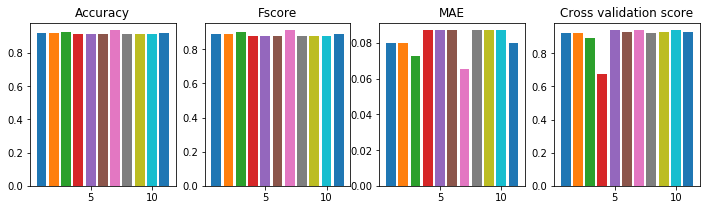

In [28]:

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


model_1 = DecisionTreeClassifier(max_depth=1)
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=1)
model_3 = GaussianNB()
model_4 = KNeighborsClassifier(n_neighbors=4)
model_5 = RandomForestClassifier(n_estimators=200, random_state=0)
model_6 = svm.SVC(kernel='rbf', C = 2)
model_7 = LogisticRegression(random_state=5)
model_8 = XGBClassifier(n_estimators =10, learning_rate = 0.33, max_depth=9)
model_9 = GradientBoostingClassifier(learning_rate = 0.3)
model_10 = ExtraTreesClassifier()
model_11 = AdaBoostClassifier()

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7,model_8,model_9,model_10,model_11]

plot_models(models)
    

In [29]:
#combined
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('model_A', model_2), ('Model_B', model_3)], 
                       voting='soft', weights=[1,1]).fit(X_train,y_train)
print('The accuracy for combined model is:',ensemble.score(X_valid,y_valid))

The accuracy for combined model is: 0.9130434782608695


n: 100  rs: 0  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 0  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 0  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 0  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 0  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 1  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 1  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 1  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 1  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 1  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 2  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 2  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 2  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 2  Accuracy: 0.9130434782608695  F scor

n: 300  rs: 22  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 22  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 22  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 25  Accuracy: 0.9130434782

n: 400  rs: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 300  rs: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 400  rs: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 500  rs: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 100  rs: 47  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 200  rs: 47  Accuracy: 0.9130434782

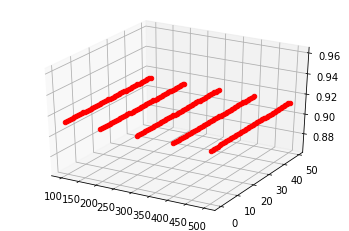

In [30]:
# Select best n_estimators and random_state for RandomForestClassifier

from sklearn.metrics import mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot_rs(n_estimators, random_state):
    rfc_model=RandomForestClassifier(n_estimators=n_estimators, random_state = random_state)
    rfc_model.fit(X_train,y_train)
    rfc_pred=rfc_model.predict(X_valid)
    A = metrics.accuracy_score(y_valid, rfc_pred)
    P = metrics.precision_score(y_valid, rfc_pred)
    R = metrics.recall_score(y_valid, rfc_pred)

    F = 2*P*R/(P+R)
    print("n:",n_estimators," rs:", random_state, " Accuracy:", A , " F score:", F)
    #plt.style.use('seaborn-whitegrid')
    #plt.plot(random_state, A, 'o')
    ax.scatter(n_estimators, random_state, A, c='r', marker='o')
    return A
max_a=0

for rs in range (0,50,1):
    for ne in range(100,501,100):
        a=plot_rs(ne, rs)
        if(a>max_a):
            max_a = a
print('max accu:', max_a)


n: 1  md: 7  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 8  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 9  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 10  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 11  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 12  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 13  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 14  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 15  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 16  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 17  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 18  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 19  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 1  md: 20  Accuracy: 0.9130434782608695  F score: 0.877551020408

n: 3  md: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 47  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 48  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 49  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 3  md: 50  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 7  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 8  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 9  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 10  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 11  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 12  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 4  md: 13  Accuracy: 0.9130434782608695  F score: 0.877551020408

n: 6  md: 37  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 38  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 39  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 40  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 41  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 42  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 43  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 47  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 48  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 49  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 6  md: 50  Accuracy: 0.9130434782608695  F score: 0.877551020

n: 9  md: 26  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 27  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 28  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 29  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 30  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 31  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 32  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 33  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 34  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 35  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 36  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 37  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 38  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 9  md: 39  Accuracy: 0.9130434782608695  F score: 0.877551020

n: 12  md: 15  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 16  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 17  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 18  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 19  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 20  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 21  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 22  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 25  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 26  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 27  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 12  md: 28  Accuracy: 0.9130434782608695  F scor

n: 14  md: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 47  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 48  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 49  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 14  md: 50  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 7  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 8  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 9  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 10  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 11  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 12  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 15  md: 13  Accuracy: 0.9130434782608695  F score: 

n: 17  md: 31  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 32  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 33  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 34  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 35  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 36  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 37  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 38  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 39  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 40  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 41  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 42  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 43  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 17  md: 44  Accuracy: 0.9130434782608695  F scor

n: 20  md: 13  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 14  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 15  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 16  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 17  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 18  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 19  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 20  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 21  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 22  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 23  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 24  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 25  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 20  md: 26  Accuracy: 0.9130434782608695  F scor

n: 22  md: 44  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 45  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 46  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 47  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 48  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 49  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 22  md: 50  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 7  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 8  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 9  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 10  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 11  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 12  Accuracy: 0.9130434782608695  F score: 0.8775510204081632
n: 23  md: 13  Accuracy: 0.9130434782608695  F score: 

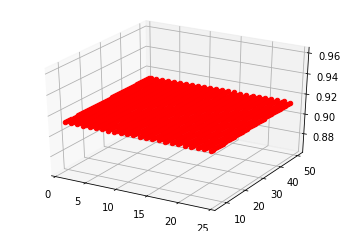

In [31]:
# Select best max_depth XGB

from sklearn.metrics import mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot_md( n_estimators, learning_rate, max_depth):
    rfc_model=XGBClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth=max_depth)
    rfc_model.fit(X_train,y_train)
    rfc_pred=rfc_model.predict(X_valid)
    A = metrics.accuracy_score(y_valid, rfc_pred)
    P = metrics.precision_score(y_valid, rfc_pred)
    R = metrics.recall_score(y_valid, rfc_pred)

    F = 2*P*R/(P+R)
    print("n:",n_estimators," md:", max_depth, " Accuracy:", A , " F score:", F)
    #plt.style.use('seaborn-whitegrid')
    #plt.plot(random_state, A, 'o')
    ax.scatter(n_estimators, max_depth, A, c='r', marker='o')
    return A

max_a=0
for ne in range (1,25,1):
    for md in range(7,51,1):
        a=plot_md(ne, 0.33, md)
        if(a>max_a):
            max_a = a
print('max accu:', max_a)


0.9202898550724637


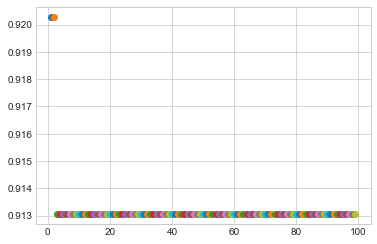

In [32]:
# Select best max_depth Tree

from sklearn.metrics import mean_absolute_error

def plot_md( max_depth):
    rfc_model=DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    rfc_model.fit(X_train,y_train)
    rfc_pred=rfc_model.predict(X_valid)
    A = metrics.accuracy_score(y_valid, rfc_pred)
    P = metrics.precision_score(y_valid, rfc_pred)
    R = metrics.recall_score(y_valid, rfc_pred)
    
    F = 2*P*R/(P+R)
    #print("n:",max_depth," rs:", A , " F score:", F)
    plt.style.use('seaborn-whitegrid')
    plt.plot(max_depth, A, 'o')
    return A
max_a=0
for md in range(1, 100, 1):
    A = plot_md(md)
    if A>max_a:
        max_a=A
print(max_a)


0.9347826086956522


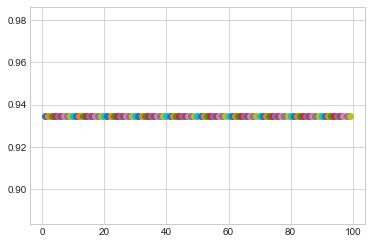

In [40]:
# Select Logistic regression random states

from sklearn.metrics import mean_absolute_error

def plot_lr( rs):
    rfc_model= LogisticRegression(random_state=rs)
    rfc_model.fit(X_train,y_train)
    rfc_pred=rfc_model.predict(X_valid)
    A = metrics.accuracy_score(y_valid, rfc_pred)
    P = metrics.precision_score(y_valid, rfc_pred)
    R = metrics.recall_score(y_valid, rfc_pred)
    
    F = 2*P*R/(P+R)
    #print("n:",rs," rs:", A , " F score:", F)
    plt.style.use('seaborn-whitegrid')
    plt.plot(rs, A, 'o')
    return A
max_a=0
for rs in range(1, 100, 1):
    A = plot_lr(rs)
    if A>max_a:
        max_a=A
print(max_a)


In [37]:
# final model and results
final_model= LogisticRegression(random_state=5)
final_model.fit(X,y)
preds = final_model.predict(X_valid)


In [38]:
#generate submission file

def submit(op):
    df_submission=pd.DataFrame(columns=['Id','Category'])
    ins=len(op)
    ids=[int(i) for i in range(1,ins+1)]
    df_submission['Id']=ids
    cat=[]
    for i in op:
        if i==0:
            cat.append('Failure')
        elif i==1:
            cat.append('Success')
    df_submission['Category']=cat

    
    df_submission.to_csv("Group_7.csv",index=False)
    return df_submission.tail()

In [39]:
submit(preds)
#preds = pd.DataFrame(preds)
#print(preds.head(14))

,Id,Category
133,134,Success
134,135,Success
135,136,Success
136,137,Success
137,138,Success
